# Chapter 10: Clustering Techniques
This notebook provides practical "recipes" for text classification and multiclass classification problems. Each recipe includes explanations, code examples, visualizations, best practices, and common pitfalls when applicable. 

## Getting ready
We’ll start by creating some dummy data with scikit-learn’s make_blobs() function (which is very appropriately named).

In [18]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Create the dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=2024)
X = StandardScaler().fit_transform(X)

# How to do it...
Let’s have a look at when we generated. You’ll also notice that we applied the StandardScaler() in order to transform our values using z-scores. This will make our clusters easier to visualize.

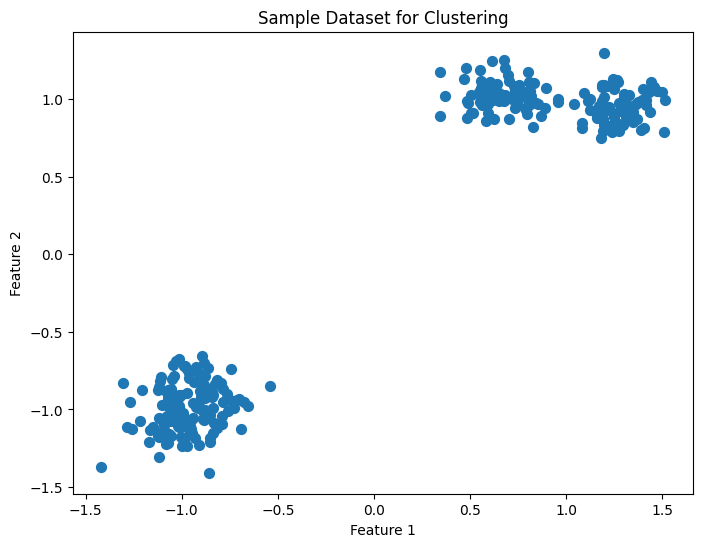

In [19]:
# Visualize the raw data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Sample Dataset for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## How it works...
Clustering works by calculating the similarity between data points based on distance metrics or density measures. Depending on the algorithm, the approach to determining clusters can vary significantly.

K-means Clustering
K-means is a centroid-based clustering algorithm that partitions data into a predefined number of clusters (which is perfect considering our data is quite “blobby” from the previous section). First, k-means randomly creates centroids in our feature space. Next, it iteratively assigns each data point to the nearest cluster centroid and then recalculates the cluster centroids and moves them in the feature space so that they are positioned approximately within the average distance among the data points current assigned to them in the current iteration. This process continues until “convergence” where the centroids don’t move much and data points are not being reassigned to other cluster centroid. K-means is efficient and works best when clusters are convex, isotropic, and roughly equal in size…which also can be its greatest weakness.
Getting ready
Here, we’ll use the previous dummy data and just load in the KMeans() function from scikit-learn.

In [20]:
# Load the libraries
from sklearn.cluster import KMeans
# Reuse the dataset from the previous section
# Dataset already loaded and scaled as X

## How to do it...
To apply k-means, we have to simply provide n_clusters as our only required argument (the “k” in “k-means” is a reference to this cluster number). This initializes the same number of centroids when we begin the iterative process described earlier. This also implies that we know or at least can estimate the number of clusters beforehand. This could also be a potential limitation of k-means if we don’t have an estimate to begin with. However, typically we take steps to refine this value as we’ll see below.

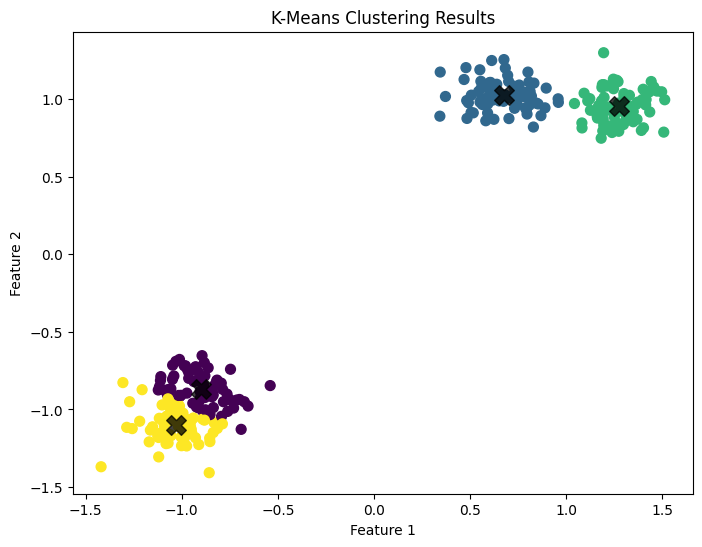

In [21]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=2024)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## How it works...
K-Means follows an iterative refinement approach:
- Initialization: The centroids of “k” clusters are initialized randomly or using methods like 'k-means++'.
- Assignment Step: Each data point is assigned to the nearest centroid based on a distance metric (typically Euclidean distance which uses the common straight-line distance described using x/y coordinates).
- Update Step: The centroid of each cluster is recalculated as the mean of all assigned points.
This process continues until the assignments no longer change (convergence) or a maximum number of iterations is reached. K-means minimizes within-cluster variance (inertia).
This plot displays the four clusters found by K-Means, along with their respective centroids marked by black X's.

There’s more...
How do you choose the optimal number of clusters? One popular method to determine the best value of “k” is the elbow method. It involves plotting the sum of squared distances (inertia) for a range of “k” values and looking for the point where adding more clusters yields diminishing returns.

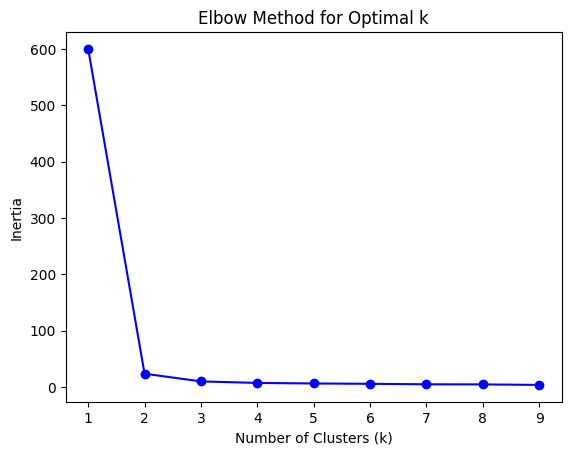

In [22]:
# Calculate and plot clustering inertia
inertia = []
k_values = range(1, 10)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=2024)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(k_values, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Hierarchical Clustering
Hierarchical clustering builds nested clusters by either merging or splitting them successively. It is especially useful when the number of clusters is not known in advance, and it provides a tree-like structure (dendrogram) that visually conveys relationships among the data. This is an improvement on k-means that requires a value for “k” prior to execution. There are two main approaches: agglomerative (bottom-up) and divisive (top-down). In practice, agglomerative clustering is more commonly used and supported directly in scikit-learn.

## Getting ready
As before, we can use the same dataset we created earlier and simply apply the new technique to it by importing the scikit-learn class and helper functions.

In [23]:
# Load the libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Reuse the dataset from the earlier section
# Dataset already loaded and scaled as X

## How to do it...
Here, we apply agglomerative clustering. We can specify a number of clusters, or we can specify a distance metric threshold to create a cutoff point for the number of clusters returned – one or the other, but in its purest form, no set number of clusters is required.

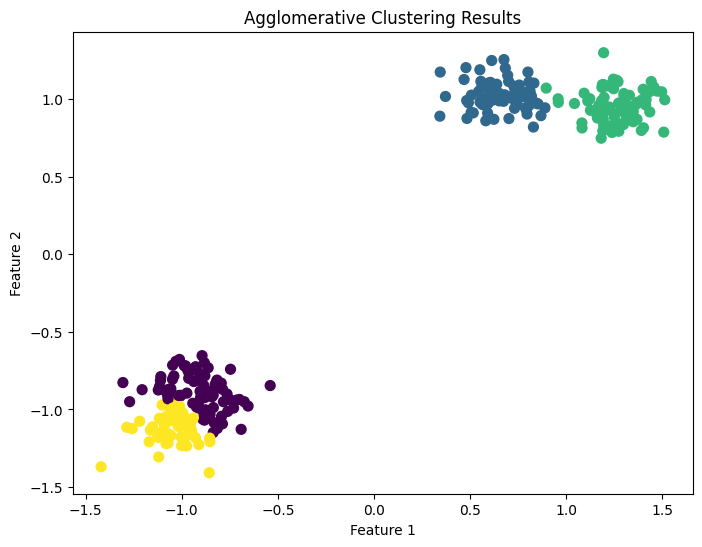

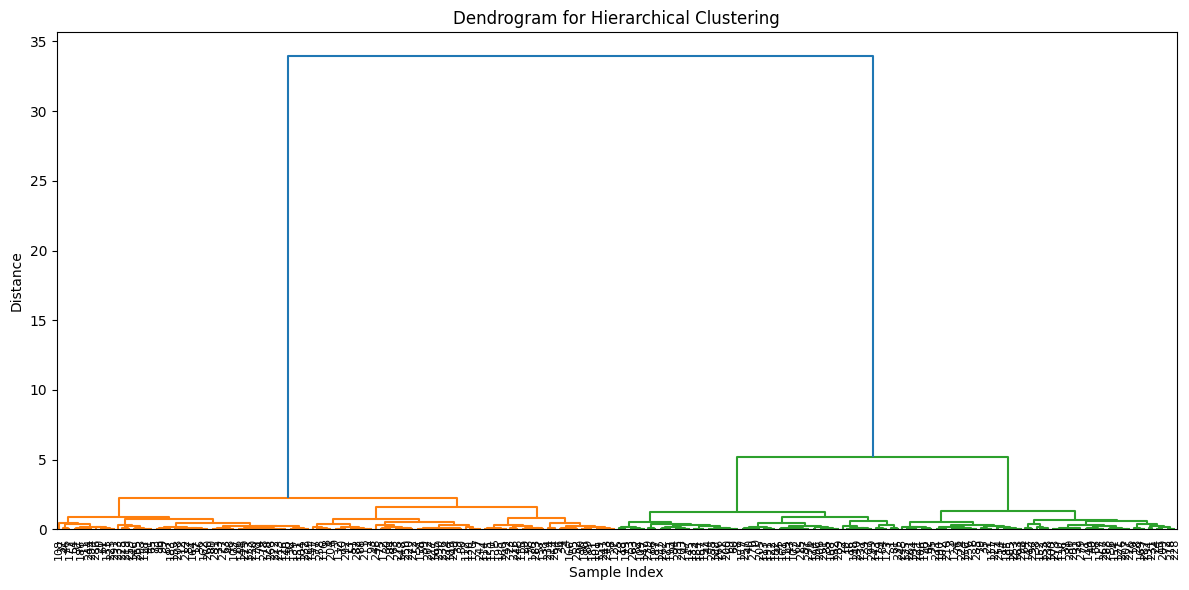

In [24]:
# Apply agglomerative clustering
agg = AgglomerativeClustering(n_clusters=4)
y_agg = agg.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis', s=50)
plt.title("Agglomerative Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Generate the dendrogram using SciPy
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## How it works...
Agglomerative clustering follows a bottom-up approach:
- Each data point starts as its own cluster.
- At each step, the two closest clusters are merged based on a linkage criterion.
- This continues until all points are merged into a single cluster or until a stopping condition (such as a predefined number of clusters) is met.
The linkage method defines how the distance between clusters is calculated:
- Ward: Minimizes the variance of the merged clusters (default and most commonly used)
- Complete: Maximum distance between points in two clusters
- Average: Average distance between all pairs of points
- Single: Minimum distance between points
The dendrogram visualizes the clustering process and can guide the selection of the number of clusters by choosing a height to "cut" the tree.

## There's more...
Dendrograms are powerful for understanding the structure of the data. If clusters are well-separated, the height of the linkage distances will show clear gaps. This can help in determining whether a natural grouping exists in the data.
While scikit-learn does not provide native support for divisive clustering (top-down), similar approaches can be implemented using other tools or custom algorithms. Divisive clustering starts with all points in one cluster and recursively splits them.

# Density-Based Clustering with DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a somewhat unique clustering algorithm capable of identifying clusters of varying shapes and sizes. It differs from K-means and hierarchical clustering by not requiring the number of clusters to be specified in advance and by handling outliers (noise) effectively. This means, unlike k-means, it does not generate centroids a priori.

## Getting ready
Here, we are going to use another data generator function in scikit-learn called make_moons(), which, again, like make_blobs() is aptly named!

In [25]:
# Load the libraries
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Create a new one with noise
X, _ = make_moons(n_samples=300, noise=0.1, random_state=2024)

## How to do it...
Let’s execute DBSCAN. In this example we are setting the two most important arguments, eps and min_samples, to 0.2 and 5, respectively. More on these below.

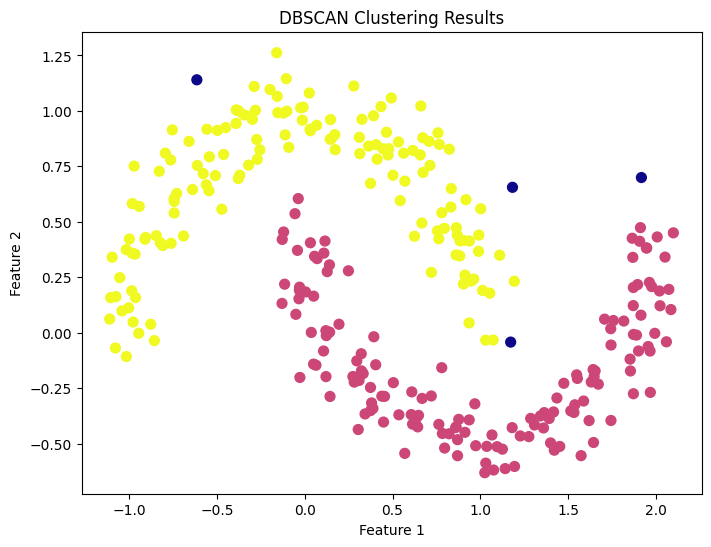

In [26]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_db = dbscan.fit_predict(X)

# Plot the DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_db, cmap='plasma', s=50)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## How it works...
DBSCAN groups data points based on two main parameters:
- eps: The radius of the neighborhood around a point.
- min_samples: The minimum number of points required to form a dense region.
Points are classified into three categories:
- Core points: Have at least min_samples within eps distance.
- Border points: Fall within the eps neighborhood of a core point but have fewer than min_samples neighbors themselves.
- Noise points: Neither core nor border points.
DBSCAN starts from an unvisited point, checks its “neighborhood,” and forms clusters by recursively including density-connected neighbors. It’s particularly good at identifying non-spherical clusters and separating noise which is highly valuable in real-world applications where data is often “dirty.”

## There’s more...
How do you choose eps and min_samples? The performance of DBSCAN is sensitive to the choice of eps and min_samples. A k-distance plot can help determine a good value for eps. Plot the distance to the k-th nearest neighbor (where k = min_samples) for all points and look for a sharp bend (elbow).

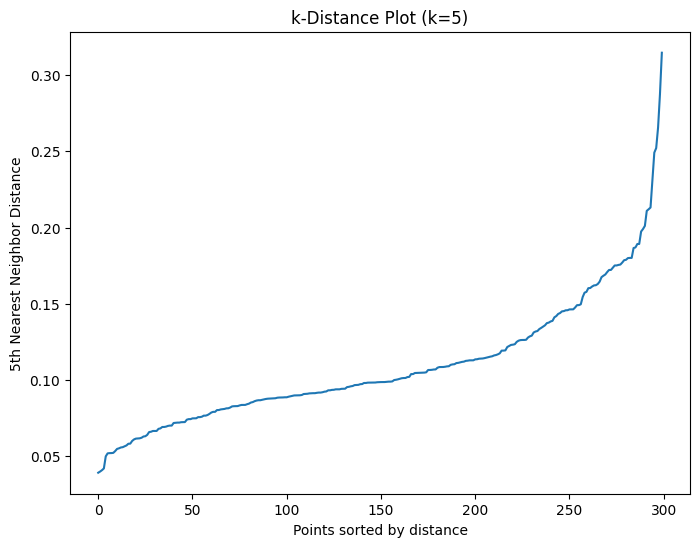

In [27]:
# Load libraries
from sklearn.neighbors import NearestNeighbors

# Generate Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances[:, 4])

# Plot k-distance
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("k-Distance Plot (k=5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

# Cluster Evaluation Metrics
Evaluating the results of clustering is crucial to assess the quality and relevance of the groupings discovered by unsupervised algorithms. However, unlike supervised learning, clustering lacks true labels or target values we’re trying to predict, so we rely on internal and external evaluation metrics such as the silhouette score, Davies-Bouldin index, and adjusted Rand index to determine how well the model has performed. Again, with unsupervised learning techniques, evaluation can be seen as more of an art than science, but we can still make educated decisions with the right tools.

## Getting ready
To begin, we’ll load our evaluation metrics, create a dummy data set and fit a k-means clustering model.

In [28]:
# Load the libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate a labeled dataset for evaluation
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=2024)

# Fit KMeans for use with evaluation metrics
kmeans = KMeans(n_clusters=4, random_state=2024)
y_kmeans = kmeans.fit_predict(X)

## How to do it...
Applying the evaluation techniques is straightforward and simply takes the input data and the trained model.

In [29]:
# Calculate the silhouette score
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.3f}")

# Calculate the Davies-Bouldin index
db_index = davies_bouldin_score(X, y_kmeans)
print(f"Davies-Bouldin Index: {db_index:.3f}")

# (Optional) Calculate adjusted Rand index if ground truth is known
ari = adjusted_rand_score(y_true, y_kmeans)
print(f"Adjusted Rand Index: {ari:.3f}")

Silhouette Score: 0.534
Davies-Bouldin Index: 0.702
Adjusted Rand Index: 0.814


## How it works...
- **Silhouette Score**: measures how similar a point is to its own cluster compared to other clusters. It ranges from -1 (poor clustering) to 1 (dense and well-separated clusters). A higher value indicates better-defined clusters.
- **Davies-Bouldin Index**: evaluates the average similarity ratio of each cluster with its most similar one. Lower values indicate better clustering. Unlike the silhouette score, this metric penalizes overlapping clusters.
- **Adjusted Rand Index (ARI)**: compares the clustering result to a known ground truth by examining all pairs of samples and counting pairs assigned to the same or different clusters. It corrects for chance and ranges from -1 to 1, where 1 indicates perfect agreement.

## There’s more...
Additional metrics to consider include Calinski-Harabasz Index.  This is also called the variance ratio criterion and it favors well-separated and dense clusters. Like the Davies-Bouldin index, it is computed using intra-cluster and inter-cluster dispersion.

# Choosing the Right Clustering Algorithm
Selecting the most suitable clustering algorithm depends heavily on the structure and properties of the dataset. There’s no one-size-fits-all solution—different algorithms are suited to different types of data distributions, levels of noise, and dimensionality! This section compares key characteristics of clustering algorithms and provides guidance for choosing among them.

## Getting ready
Let’s begin by creating a variety of dummy datasets using scikit-learn functions we’ve used before.

In [30]:
# Load the libraries
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.preprocessing import StandardScaler

# Create and scale different datasets
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=2024)
X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=2024)
X_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=2024)

X_blobs = StandardScaler().fit_transform(X_blobs)
X_moons = StandardScaler().fit_transform(X_moons)
X_circles = StandardScaler().fit_transform(X_circles)

# How to do it...
Each data structure lends itself to a particular clustering algorithm.

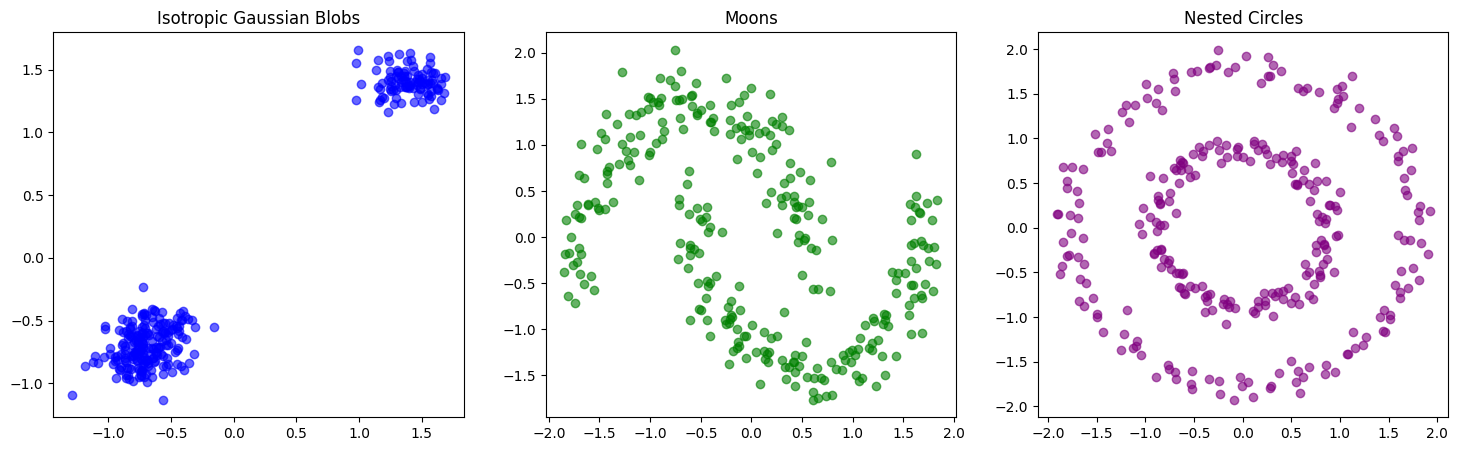

In [31]:
# Visualize the datasets
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
axs[0].scatter(X_blobs[:, 0], X_blobs[:, 1], c='blue', alpha=0.6)
axs[0].set_title("Isotropic Gaussian Blobs")
axs[1].scatter(X_moons[:, 0], X_moons[:, 1], c='green', alpha=0.6)
axs[1].set_title("Moons")
axs[2].scatter(X_circles[:, 0], X_circles[:, 1], c='purple', alpha=0.6)
axs[2].set_title("Nested Circles")
plt.show()

## How it works...
When selecting a clustering algorithm, consider the following factors:
- Cluster Shape: K-Means performs well with convex clusters. DBSCAN or spectral clustering are better suited for non-convex shapes.
- Noise Handling: DBSCAN explicitly handles noise by identifying outliers as separate from clusters. K-Means and hierarchical clustering assign all points to a cluster.
- Scalability: K-Means scales well to large datasets. Hierarchical clustering is less scalable due to its time complexity.
- Parameter Sensitivity:
  - K-Means: sensitive to k and initialization.
  - DBSCAN: sensitive to eps and min_samples.
  - Agglomerative clustering: affected by linkage method and stopping criteria.
- Dimensionality: Clustering in high dimensions often requires dimensionality reduction (e.g., PCA) beforehand due to the curse of dimensionality.

## There’s more...
Choosing your clustering technique should be based on the characteristics of your data. It’s always good to plot your raw dataset beforehand to try to identify any underlying structure that can guide your approach.

# Advanced Clustering Techniques
Beyond the “classic” clustering algorithms like, scikit-learn offers several advanced techniques such as Spectral Clustering and Gaussian Mixture Models (GMMs). These methods provide more flexibility in modeling complex cluster shapes and probabilistic cluster assignments, making them useful for more nuanced tasks.

## Getting ready
Let’s begin by loading our two new clustering models and generating some dummy data to test them on.

In [32]:
# Load the libraries
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
# Create datasets with complex structure
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

X, _ = make_moons(n_samples=300, noise=0.05, random_state=2024)
X = StandardScaler().fit_transform(X)

## How to do it...
Each model is fit in a similar fashion as the previous models.

c:\Users\aashi\GitHub\My Repositories\Machine-Learning-Implementation\venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


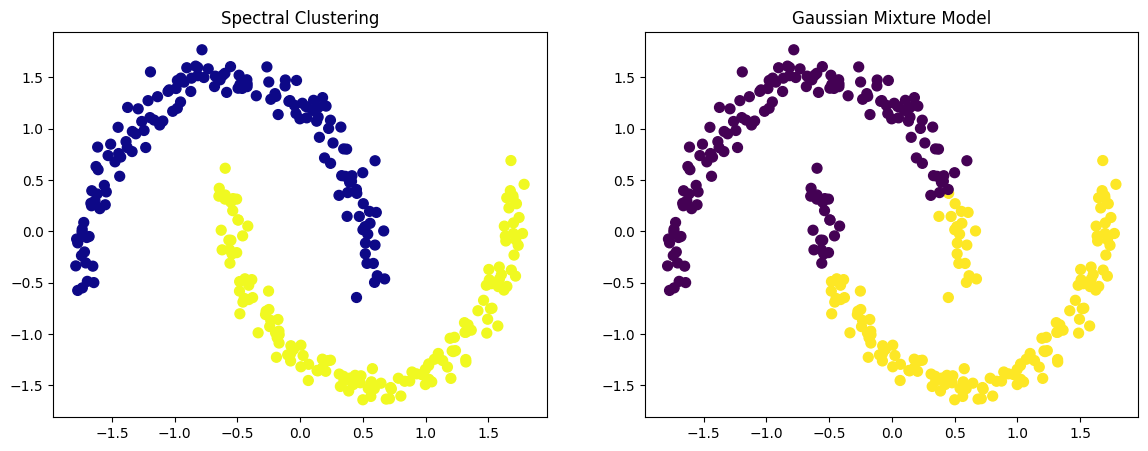

In [33]:
# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=2024)
y_spectral = spectral.fit_predict(X)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=2024)
y_gmm = gmm.fit_predict(X)

# Visualize both clustering results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(X[:, 0], X[:, 1], c=y_spectral, cmap='plasma', s=50)
ax1.set_title("Spectral Clustering")

ax2.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=50)
ax2.set_title("Gaussian Mixture Model")

plt.show()

## How it works...
Let’s take a closer look at each of these techniques to understand how they work.

### Spectral Clustering
- Constructs a similarity graph from the data.
- Constructs a matrix that represents the relationships between the data points.
- Maps this high-dimensional graph to a lower-dimensional feature space.
- Applies K-means on the reduced representation.
This method is effective for non-convex clusters and is influenced by the similarity measure (e.g., radial basis, nearest neighbors). It also works well on large datasets with many features.

### Gaussian Mixture Models (GMMs)
- GMMs are a “soft clustering” method based on the assumption that data is generated from a mixture of several Gaussian (or normal) distributions.
- Each point is assigned a probability of belonging to each cluster.
- The Expectation-Maximization (EM) algorithm is used to find the parameters that maximize the likelihood of the data.
- GMMs offer flexibility in capturing elliptical shapes and overlapping clusters and can be used for anomaly detection or probabilistic classification. Because of their reliance on probability estimation, GMMs can fluidly assign data to clusters depending on thresholds, if needed.

## There’s more...
- Visualizing cluster probabilities with GMM provides a predict_proba method to show the likelihood of each point belonging to each cluster. This can be useful when uncertainty about data point cluster assignments come into play.
- Also, one can apply Dimensionality reduction with advanced clustering. Advanced clustering methods like Spectral Clustering can benefit from prior dimensionality reduction (e.g., PCA or t-SNE), especially with high-dimensional data. This step enhances performance and interpretability.

# Practical Exercises with Clustering Models
In this final section, readers will engage in practical exercises that involve building, tuning, and evaluating clustering models on real-world datasets. These exercises are designed to reinforce the concepts learned throughout the chapter and demonstrate how to effectively apply clustering techniques in various scenarios. By the end of this section, readers will have hands-on experience that they can leverage in their own ML projects.

## Exercise 1: Clustering with K-Means on the Iris Dataset
In this example, we’ll apply K-Means clustering to the well-known Iris dataset and evaluate the results using multiple metrics.

### Implementation Steps:

In [34]:
# Load libraries
YOUR CODE HERE

# Load the Dataset
YOUR CODE HERE

# Create and Train the KMeans Model
YOUR CODE HERE

# Evaluate the Clustering
YOUR CODE HERE

# Visualize the Cluster Assignments (PCA Projection)
YOUR CODE HERE

SyntaxError: invalid syntax (3444110047.py, line 2)

## Exercise 2: Comparing DBSCAN and K-Means on Moons Data
This exercise demonstrates how DBSCAN can outperform K-Means on data with non-convex shapes.

### Implementation Steps:

In [ ]:
# Load libraries
YOUR CODE HERE

# Create and Scale the Dataset
YOUR CODE HERE

# Apply KMeans and DBSCAN
YOUR CODE HERE

# Visualize the Clustering Results
YOUR CODE HERE

## Exercise 3: Clustering High-Dimensional Data with PCA + GMM
This exercise combines dimensionality reduction with a probabilistic clustering approach using Gaussian Mixture Models.

### Implementation Steps:

In [ ]:
# Load libraries
YOUR CODE HERE

# Load and Preprocess the Dataset
YOUR CODE HERE

# Apply PCA for Dimensionality Reduction
YOUR CODE HERE

# Fit Gaussian Mixture Model
YOUR CODE HERE

# Visualize the Clustered Output
YOUR CODE HERE